In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df1=pd.read_csv('mHealth_subject1.csv')
df2=pd.read_csv('mHealth_subject2.csv')
df3=pd.read_csv('mHealth_subject3.csv')
df4=pd.read_csv('mHealth_subject4.csv')
df5=pd.read_csv('mHealth_subject5.csv')
df6=pd.read_csv('mHealth_subject6.csv')
df7=pd.read_csv('mHealth_subject7.csv')
df8=pd.read_csv('mHealth_subject8.csv')
df9=pd.read_csv('mHealth_subject9.csv')
df10=pd.read_csv('mHealth_subject10.csv')

In [7]:
df1["subject"]=["subject1"]*len(df1)
df1=df1[:-1]
df2["subject"]=["subject2"]*len(df2)
df2=df2[:-1]
df3["subject"]=["subject3"]*len(df3)
df3=df3[:-1]
df4["subject"]=["subject4"]*len(df4)
df4=df4[:-1]
df5["subject"]=["subject5"]*len(df5)
df5=df5[:-1]
df6["subject"]=["subject6"]*len(df6)
df6=df6[:-1]
df7["subject"]=["subject7"]*len(df7)
df7=df7[:-1]
df8["subject"]=["subject8"]*len(df8)
df8=df8[:-1]
df9["subject"]=["subject9"]*len(df9)
df9=df9[:-1]
df10["subject"]=["subject10"]*len(df10)
df10=df10[:-1]

In [8]:
# Renaming acceleration and gyro columns
def renameAccelerationAndGyroColumns(df):
    df.rename(columns={
        'acceleration from the left-ankle sensor (X axis)':'alx',
        'acceleration from the left-ankle sensor (Y axis)':'aly',
        'acceleration from the left-ankle sensor (Z axis)':'alz',
        'gyro from the left-ankle sensor (X axis)':'glx',
        'gyro from the left-ankle sensor (Y axis)':'gly',
        'gyro from the left-ankle sensor (Z axis)':'glz',
        'acceleration from the right-lower-arm sensor (X axis)':'arx',
        'acceleration from the right-lower-arm sensor (Y axis)':'ary',
        'acceleration from the right-lower-arm sensor (Z axis)':'arz',
        'gyro from the right-lower-arm sensor (X axis)':'grx',
        'gyro from the right-lower-arm sensor (Y axis)':'gry',
        'gyro from the right-lower-arm sensor (Z axis)':'grz',
        'Label':'Activity'
    },inplace=True)
renameAccelerationAndGyroColumns(df1)
renameAccelerationAndGyroColumns(df2)
renameAccelerationAndGyroColumns(df3)
renameAccelerationAndGyroColumns(df4)
renameAccelerationAndGyroColumns(df5)
renameAccelerationAndGyroColumns(df6)
renameAccelerationAndGyroColumns(df7)
renameAccelerationAndGyroColumns(df8)
renameAccelerationAndGyroColumns(df9)
renameAccelerationAndGyroColumns(df10)

In [9]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index=True)

### Activity Specific Column Outliers

In [10]:
outliers=[]
for i in range(1,13):
    DF=df[df['Activity']==i]
    outlier_columns=[]
    for column in DF.columns[:-2]:
        outlier_threshold=1.5
        Q1=DF[column].quantile(0.25)
        Q3=DF[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-outlier_threshold*IQR
        upper_bound=Q3+outlier_threshold*IQR
        outlier_columns.append((column,len(DF[(DF[column]<lower_bound) | (DF[column]>upper_bound)])))
    outlier_columns.sort(key=lambda x:-x[1])
    outliers.append(outlier_columns[:2])
outliers

[[('electrocardiogram signal (lead 1)', 4258),
  ('magnetometer from the right-lower-arm sensor (X axis)', 3525)],
 [('aly', 5879),
  ('magnetometer from the right-lower-arm sensor (Z axis)', 4516)],
 [('arz', 4242), ('electrocardiogram signal (lead 1)', 3872)],
 [('alz', 5034), ('electrocardiogram signal (lead 2)', 3828)],
 [('electrocardiogram signal (lead 1)', 5451),
  ('electrocardiogram signal (lead 2)', 5095)],
 [('electrocardiogram signal (lead 2)', 3745),
  ('electrocardiogram signal (lead 1)', 3023)],
 [('magnetometer from the right-lower-arm sensor (Z axis)', 4468),
  ('electrocardiogram signal (lead 2)', 4180)],
 [('electrocardiogram signal (lead 1)', 3962),
  ('electrocardiogram signal (lead 2)', 3385)],
 [('gry', 6030), ('glz', 3910)],
 [('electrocardiogram signal (lead 1)', 4459), ('arz', 3063)],
 [('electrocardiogram signal (lead 2)', 4583), ('grz', 3887)],
 [('electrocardiogram signal (lead 2)', 1286),
  ('acceleration from the chest sensor (Z axis)', 1212)]]

### Standing Still

<AxesSubplot:>

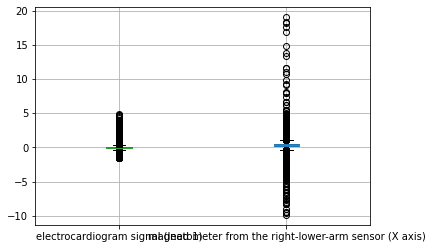

In [12]:
df[df['Activity']==1].loc[:,["electrocardiogram signal (lead 1)","magnetometer from the right-lower-arm sensor (X axis)"]].boxplot()

### Sitting and relaxing

<AxesSubplot:>

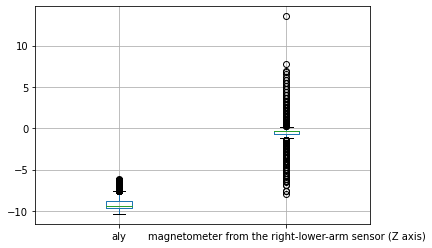

In [13]:
df[df['Activity']==2].loc[:,["aly","magnetometer from the right-lower-arm sensor (Z axis)"]].boxplot()

### Lying down

<AxesSubplot:>

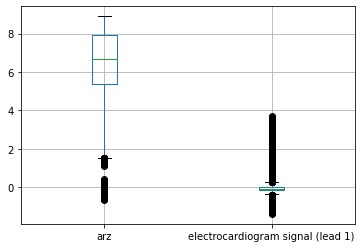

In [14]:
df[df['Activity']==3].loc[:,["arz","electrocardiogram signal (lead 1)"]].boxplot()

### Walking

<AxesSubplot:>

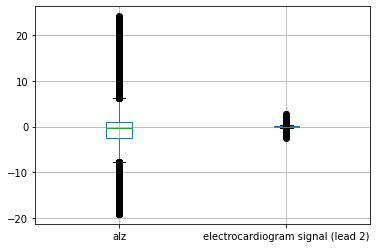

In [15]:
df[df['Activity']==4].loc[:,["alz","electrocardiogram signal (lead 2)"]].boxplot()

### Climbing stairs

<AxesSubplot:>

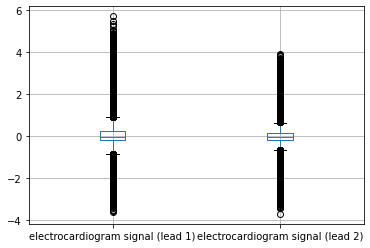

In [16]:
df[df['Activity']==5].loc[:,["electrocardiogram signal (lead 1)","electrocardiogram signal (lead 2)"]].boxplot()

### Waist bends forward

<AxesSubplot:>

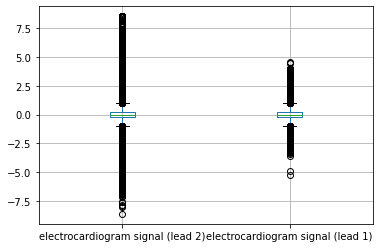

In [17]:
df[df['Activity']==6].loc[:,["electrocardiogram signal (lead 2)","electrocardiogram signal (lead 1)"]].boxplot()

### Frontal elevation of arms

<AxesSubplot:>

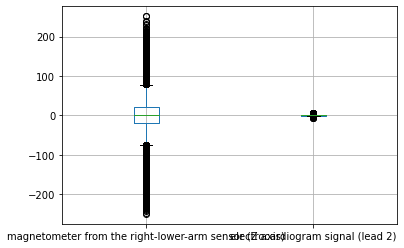

In [19]:
df[df['Activity']==7].loc[:,["magnetometer from the right-lower-arm sensor (Z axis)","electrocardiogram signal (lead 2)"]].boxplot()

### Knees bending (crouching)

<AxesSubplot:>

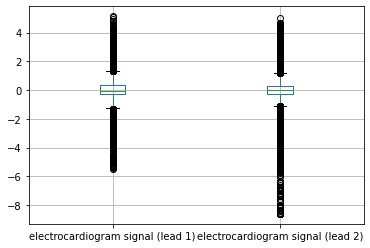

In [20]:
df[df['Activity']==8].loc[:,["electrocardiogram signal (lead 1)","electrocardiogram signal (lead 2)"]].boxplot()

### Cycling

<AxesSubplot:>

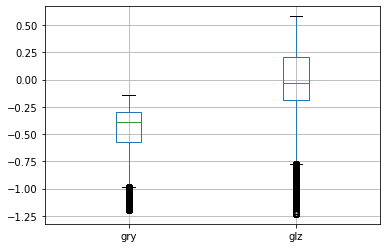

In [21]:
df[df['Activity']==9].loc[:,["gry","glz"]].boxplot()

### Jogging

<AxesSubplot:>

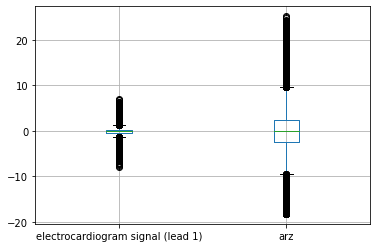

In [22]:
df[df['Activity']==10].loc[:,["electrocardiogram signal (lead 1)","arz"]].boxplot()

### Running

<AxesSubplot:>

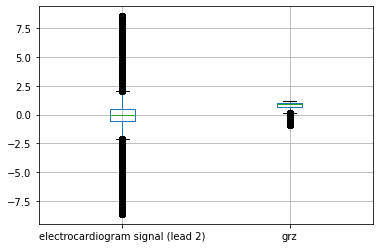

In [23]:
df[df['Activity']==11].loc[:,["electrocardiogram signal (lead 2)","grz"]].boxplot()

### Jump front & back

<AxesSubplot:>

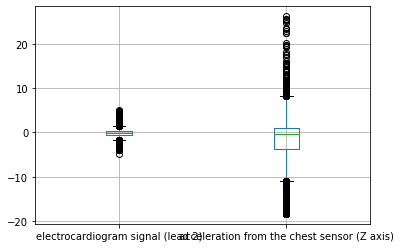

In [24]:
df[df['Activity']==12].loc[:,["electrocardiogram signal (lead 2)","acceleration from the chest sensor (Z axis)"]].boxplot()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Activity specific hazards and possible solutions

### Standing still
#### issues:
a.	electrocardiogram signal : facing potential issues such as arrhythmias, which can lead to irregular heart rhythms, or underlying heart conditions that require medical evaluation.

b.	magnetometer signal from the right-lower-arm (X-axis) : Sudden spikes in the magnetometer signal from the right-lower-arm (X-axis) may suggest potential health issues, including muscle disorders, neurological conditions, or involuntary muscle contractions. A medical evaluation is advisable to determine the underlying cause.

#### Preventive measures:
a.	electrocardiogram signal : The person should consult a healthcare professional for a thorough cardiac evaluation and follow any recommended treatment or lifestyle changes to address the underlying issue. Maintaining a heart-healthy lifestyle with regular exercise and a balanced diet can also help.

b.	magnetometer signal from the right-lower-arm (X-axis) : Consult a healthcare professional for evaluation and avoid exposure to strong magnetic fields.

### Sitting and relaxing
#### issues:
a.	acceleration from the left-ankle sensor (Y axis) : Sudden spikes in acceleration from the left-ankle sensor (Y-axis) while sitting and relaxing might indicate potential health issues, including involuntary muscle movements, tremors, or neurological conditions. A medical evaluation is recommended to determine the underlying cause.

b.	magnetometer from the right-lower-arm sensor (Z axis) : Sudden spikes in the magnetometer signal from the right-lower-arm sensor (Z-axis) while sitting and relaxing may suggest potential health issues related to muscle twitches, spasms, or neurological disturbances, requiring medical assessment for diagnosis and intervention.
#### Preventive measures:
a.	acceleration from the left-ankle sensor (Y axis) : If experiencing unexplained spikes in acceleration, seek a medical evaluation for diagnosis and guidance on appropriate precautions or treatments.

b.	magnetometer from the right-lower-arm sensor (Z axis) : In case of unexplained spikes in the magnetometer signal, consult a healthcare professional for evaluation and follow their guidance for necessary precautions or treatments.

### Lying down
#### issues:
a.	acceleration from the right-lower-arm sensor (Z axis) : Indicate potential health issues related to muscle spasms, tremors, or neurological conditions, requiring medical evaluation for diagnosis and treatment.

b.	electrocardiogram signal (lead 1) :  An abnormal electrocardiogram (ECG or EKG) signal in lead I when lying down can indicate various health issues related to the electrical activity of the heart. Lead I records electrical signals that travel from the right arm to the left arm, so abnormalities in this lead can provide valuable information about cardiac health. Some of the potential health hazards include Myocardial Infarction (Heart Attack), inflammation of the pericardium (the sac surrounding the heart) and electrolyte Imbalances

#### Preventive measures:
a.	acceleration from the right-lower-arm sensor (Z axis) : If experiencing unexplained spikes in acceleration, consult a healthcare professional for assessment and follow their recommendations for necessary precautions or interventions.

b.	electrocardiogram signal (lead 1) :  Preventing the health issues associated with abnormal electrocardiogram (ECG) signals when lying down often involves maintaining good heart health and addressing risk factors. Maintain a Healthy Lifestyle, manage stress, monitor blood pressure and manage cholestrol levels, limit alcohol and caffeine before bed and sleep well.

### Walking
#### issues:
a.	acceleration from the left ankle sensor (Z axis) : Abnormal sensor values for acceleration of the left ankle (Z-axis) when walking can be indicative of various symptoms and health issues related to gait and lower limb function, foot and/or joint problems, pain or discomfort and footwear issues, inflammation, etc.

b.	electrocardiogram signal (lead 2) : Abnormal ECG patterns during exercise can be a sign of reduced blood flow to the heart muscle, which may be due to coronary artery disease (CAD). This can lead to chest pain or angina during physical activity, valvular heart disease. Certain ECG patterns can suggest bundle branch block, which is an electrical conduction issue in the heart. It may lead to irregular heart rhythms and other heart problems.
#### Preventive measures:
a.	acceleration from the left ankle sensor (Z axis) : Stay active and exercise, strengthen muscles, maintain a healthy weight, wear proper footwear, pay attention to walking posture, improve balance and fall prevention.

b.	electrocardiogram signal (lead 2) : Regular Check-Ups, warm-up and cool down, stay hydrated and avoid excessive physical exertion (listen to your body and regular rest).

### Climbing stairs
#### issues:
electrocardiogram signal : Indicate cardiovascular stress or arrhythmias, warranting medical evaluation. 
#### Preventive measures:
electrocardiogram signal : Before starting your ascent, perform a brief warm-up that includes light aerobic exercise like brisk walking or calf raises. Maintain Good Posture. Allow your arms to naturally swing in rhythm with your steps. Avoid rushing or taking overly large steps, which can lead to undue cardiovascular stress.

### Waist bends forward
#### issues:
electrocardiogram signal : Indicate cardiovascular stress or arrhythmias, warranting medical evaluation.
#### Preventive measures:
electrocardiogram signal : Bend at the hips and knees, not at the waist, to reduce strain on your
lower back and minimize the impact on your heart. A strong core can help support  your spine and reduce the risk of back strain when bending forward.

### Frontal elevation of arms
#### issues:
a.	magnetometer from the right-lower-arm sensor (Z axis) : Conditions like essential tremor, Parkinson's disease, or other movement disorders can cause abnormal arm movements and, in turn, affect magnetometer readings during arm elevation. Neuropathies, nerve compression syndromes, or other nerve disorders affecting the arm's function can result in abnormal sensor values during arm elevation.

b.	electrocardiogram signal (lead 2) : Indicate cardiovascular stress or arrhythmias, warranting medical evaluation.
#### Preventive measures:
a.	magnetometer from the right-lower-arm sensor (Z axis) : Address any underlying neuromuscular conditions through medical evaluation and appropriate treatment. Pay attention to the health of your arm and shoulder joints. Practice stress-reduction techniques, such as relaxation, deep breathing, meditation, or mindfulness, to manage psychological factors that may affect arm movements.

b.	electrocardiogram signal (lead 2) : Be mindful of how you position your arms when raised. Avoid overextending or hyperextending your arms, which can strain your muscles and cardiovascular system. Do not hold your breath when raising your arms. Continue to breathe normally during the movement. If you are taking medications, adhere to your prescribed regimen and discuss potential side effects with your healthcare provider. 

### Knees bending (crouching)
#### issues:
electrocardiogram signal : Indicate cardiovascular stress or arrhythmias, warranting medical evaluation.
#### Preventive measures:
electrocardiogram signal : Maintain good posture while crouching. Keep your back straight, shoulders relaxed, and knees aligned with your feet. Engage your leg muscles, particularly your quadriceps and hamstrings, to support your body weight when crouching. Avoid placing excessive strain on your lower back. Engage your core muscles to provide stability and protect your lower back when crouching. Distribute your body weight evenly between both legs while crouching to prevent undue stress on one side.

### Cycling
#### issues:
a.	gyro from the right-lower-arm sensor (Y axis) : Abnormal gyro sensor readings can disrupt your ability to maintain balance and control while cycling. In response to unexpected balance challenges caused by sensor abnormalities, you may inadvertently tense or strain your muscles. This can lead to muscular discomfort, fatigue, or overuse injuries.

b.	gyro from the left-ankle sensor (Z axis) : health issues related to balance problems, coordination difficulties, or neurological disturbances, necessitating medical evaluation.
#### Preventive measures:
a.	gyro from the right-lower-arm sensor (Y axis) : Consult a healthcare professional for guidance and diagnosis if experiencing unexpected spikes in the gyro signal during activities like cycling.

b.	gyro from the left-ankle sensor (Z axis) : Seek medical assessment for guidance and diagnosis.

### Jogging
#### issues:
a.	electrocardiogram signal (lead 1) : indicate cardiac stress or arrhythmias, necessitating medical evaluation. 

b.	acceleration from the right-lower-arm sensor (Z axis) : Indicate potential health issues related to muscle spasms, tremors, or neurological conditions, requiring medical evaluation for diagnosis and treatment.
#### Preventive measures:
a.	electrocardiogram signal (lead 1) : Seek medical evaluation for guidance and further cardiac assessment

b.	acceleration from the right-lower-arm sensor (Z axis) : If experiencing unexplained spikes in acceleration, consult a healthcare professional for assessment and follow their recommendations for necessary precautions or interventions.

### Running
#### issues:
a.	electrocardiogram signal (lead 1) : indicate cardiac stress or arrhythmias, necessitating medical evaluation. 

b.	gyro from the right-lower-arm sensor (Y axis) : muscle tremors, balance problems, or neurological disturbances, warranting medical evaluation.
#### Preventive measures:
a.	electrocardiogram signal (lead 1) : Seek medical evaluation for guidance and further cardiac assessment

b.	gyro from the right-lower-arm sensor (Y axis) : Consult a healthcare professional for guidance and diagnosis if experiencing unexpected spikes in the gyro signal.

### Jump front & back
#### issues:
a.	electrocardiogram signal (lead 1) : indicate cardiac stress or arrhythmias, necessitating medical evaluation. 

b.	acceleration from the chest sensor (Z axis) : issues related to physical stress, muscular strain, or imbalance, necessitating medical evaluation.
#### Preventive measures:
a.	electrocardiogram signal (lead 1) : Seek medical evaluation for guidance and further cardiac assessment

b.	acceleration from the chest sensor (Z axis) : Consult a healthcare professional for guidance and diagnosis.